<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/main/fyp_LSTM_apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c707ff310f8eca9ea8102a0a9d9b6fcbc1febc101c89832192f5f973f50961f3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

data = yf.download(tickers = 'AAPL', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,19.606428,19.714287,19.535713,19.714287,16.667490,407282400
2012-03-13,19.912144,20.292143,19.848213,20.289286,17.153633,690855200
2012-03-14,20.644644,21.240000,20.549999,21.056429,17.802216,1418844000
2012-03-15,21.414642,21.428928,20.662500,20.912857,17.680834,1159718000
2012-03-16,20.882856,21.042856,20.642857,20.913214,17.681137,825487600
2012-03-19,21.370358,21.491785,21.037500,21.467857,18.150057,901236000
2012-03-20,21.411072,21.674999,21.124287,21.641430,18.296806,816662000
2012-03-21,21.526428,21.773214,21.478930,21.517857,18.192331,644042000
2012-03-22,21.349285,21.589287,21.268929,21.405001,18.096914,623870800


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,23.089287,23.114286,22.432142,19.046741,35.875684,23.552655,22.673908,21.845652,-3.388720,0,19.095566
1,22.484285,22.692142,22.332144,19.095566,36.765282,23.451416,22.670259,21.854182,-3.335224,0,19.248705
2,22.583929,22.683214,22.280357,19.248705,39.582099,23.376995,22.670254,21.864988,-2.987310,0,19.704475
3,22.691786,23.225000,22.535713,19.704475,47.096862,23.360785,22.680879,21.882760,-3.626532,0,19.547398
4,23.173929,23.313929,23.000000,19.547398,45.028756,23.328499,22.687629,21.897846,-3.658085,0,19.184416
5,22.842501,22.930714,22.500000,19.184416,40.613280,23.258574,22.685781,21.907071,-4.044481,0,18.493019
6,22.537500,22.563213,21.772142,18.493019,33.841003,23.117758,22.667845,21.905388,-2.645578,0,19.226564
7,21.872143,22.692142,21.812857,19.226564,44.383315,23.072631,22.667371,21.915170,-3.935953,0,18.599760
8,22.535713,22.639286,21.846430,18.599760,38.732730,22.961496,22.652289,21.915044,-3.489307,0,18.704979
9,22.194286,22.376785,21.808571,18.704979,40.104305,22.872748,22.639959,21.916562,-3.658936,0,18.483921


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.05470759 0.05242742 0.05248086 ... 0.34393971 0.         0.04256071]
 [0.05112291 0.04992461 0.05187615 ... 0.34699367 0.         0.04347489]
 [0.0517133  0.04987168 0.05156299 ... 0.36685546 0.         0.04619566]
 ...
 [0.73420066 0.75496323 0.7448696  ... 0.53574767 0.         0.77219974]
 [0.75541247 0.76984446 0.76996544 ... 0.61861954 1.         0.79244646]
 [0.76690706 0.78425145 0.78326921 ... 0.54510587 1.         0.79651942]]


In [ ]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[0.05470759 0.05242742 0.05248086 ... 0.05398809 0.04605846 0.03773333]
  [0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  ...
  [0.03730265 0.03552402 0.03703896 ... 0.03403626 0.04067667 0.03556804]
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]]

 [[0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.05308381 0.05310717 ... 0.0527882  0.04610494 0.03798794]
  ...
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]
  [0.04265638 0.04040468 0.04211427 ... 0.03474437 0.04025721 0.03536773]]

 [[0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.0

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.03457615]
 [0.03574364]
 [0.0350017 ]
 ...
 [0.56367451]
 [0.56791598]
 [0.57023328]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization
import numpy as np

np.random.seed(10)

# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# inputs = LSTM(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# Define the model
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
x = LSTM(150, name='first_layer', return_sequences=True)(lstm_input)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = LSTM(100, name='second_layer')(x)
x = Dropout(0.2)(x)
x = Dense(50, name='dense_layer1', activation='relu')(x)
output = Dense(1, name='output', activation='linear')(x)

model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
history = model.fit( X_train,
    y_train,
    batch_size=64,
    epochs=65,
    validation_data=(X_test, y_test),
    verbose=1,)

Epoch 1/65
31/31 [==============================] - 10s 182ms/step - loss: 0.0222 - mean_absolute_error: 0.1068 - val_loss: 0.3783 - val_mean_absolute_error: 0.6074
Epoch 2/65
31/31 [==============================] - 3s 111ms/step - loss: 0.0047 - mean_absolute_error: 0.0536 - val_loss: 0.4170 - val_mean_absolute_error: 0.6379
Epoch 3/65
31/31 [==============================] - 3s 113ms/step - loss: 0.0029 - mean_absolute_error: 0.0413 - val_loss: 0.4116 - val_mean_absolute_error: 0.6340
Epoch 4/65
31/31 [==============================] - 4s 131ms/step - loss: 0.0019 - mean_absolute_error: 0.0340 - val_loss: 0.4142 - val_mean_absolute_error: 0.6357
Epoch 5/65
31/31 [==============================] - 4s 137ms/step - loss: 0.0014 - mean_absolute_error: 0.0291 - val_loss: 0.3841 - val_mean_absolute_error: 0.6126
Epoch 6/65
31/31 [==============================] - 3s 111ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - val_loss: 0.3383 - val_mean_absolute_error: 0.5752
Epoch 7/65
31/3

In [ ]:
# Convert training history to datafram for viewing and graphing.
hist = pd.DataFrame(history.history)
hist.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.022243,0.106808,0.378345,0.607412
1,0.004709,0.053610,0.417041,0.637943
2,0.002851,0.041286,0.411599,0.634029
3,0.001908,0.034028,0.414200,0.635658
4,0.001446,0.029133,0.384064,0.612606


<Axes: >

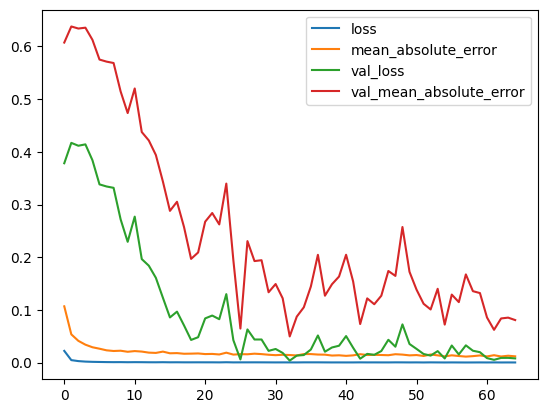

In [ ]:
# Training errors with respect to ecochs.
# loss: values of the cost function for training data.
# val_loss: values of the cost function for cross-validation data.
hist.plot()

In [ ]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 24ms/step
[0.51092124] [0.5926206]
[0.5168519] [0.57752273]
[0.5235267] [0.58695527]
[0.5261587] [0.56737486]
[0.5297839] [0.58860516]
[0.5299736] [0.60028624]
[0.5330251] [0.5996876]
[0.53706896] [0.59793541]
[0.54000086] [0.60351316]
[0.5424188] [0.60435992]


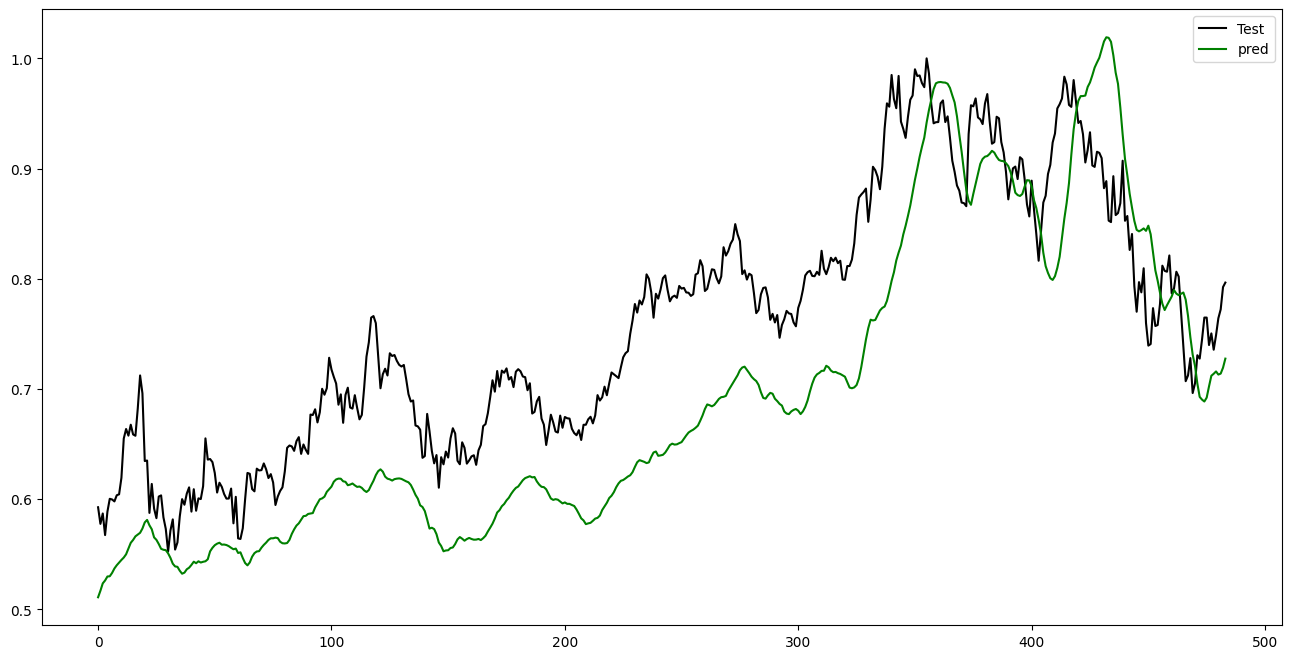

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0807
Mean Squared Error (MSE): 0.0080
Root Mean Squared Error (RMSE): 0.0894
R-squared (R2) score: 0.3827


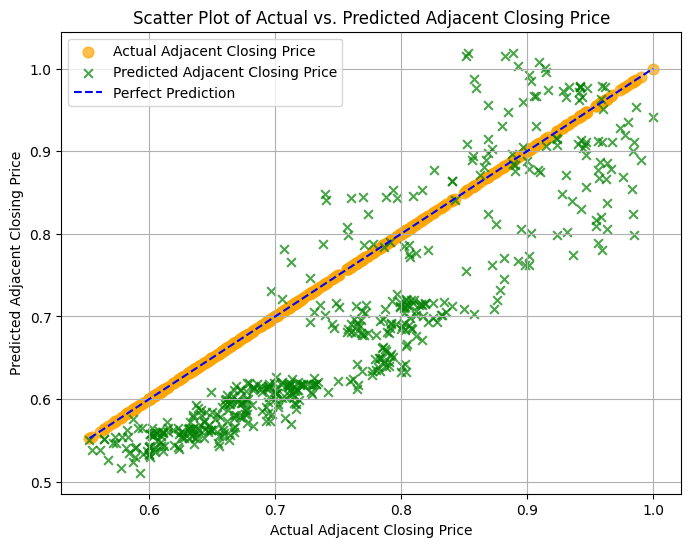

In [ ]:
# Scatter plot of actual vs. predicted adjacent closing prices
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Plot actual values as orange circles with larger markers
plt.scatter(y_test, y_test, color='orange', label='Actual Adjacent Closing Price', alpha=0.7, s=60)

# Plot predicted values as black crosses with smaller markers
plt.scatter(y_test, y_pred, color='green', label='Predicted Adjacent Closing Price', alpha=0.7, s=40, marker='x')

# Plot the diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Adjacent Closing Price')
plt.ylabel('Predicted Adjacent Closing Price')
plt.title('Scatter Plot of Actual vs. Predicted Adjacent Closing Price')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()

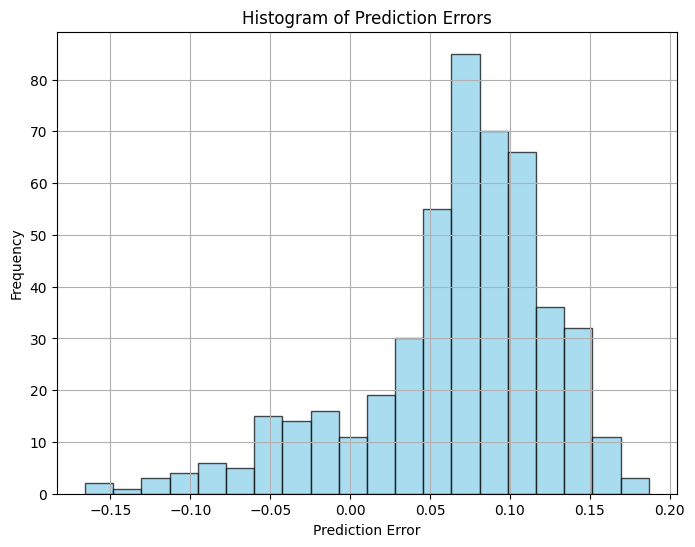

In [ ]:
# Histogram of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

plt.hist(errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')

# Add grid lines for better readability
plt.grid(True)

plt.show()